In [6]:
"""Importacion de librerias esenciales para
realizar el algoritmo de Regresion Lineal"""

# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
"""cargamos los datos de entrada"""
data = pd.read_csv("./articulos_ml.csv")
"""Visualizamos cuantas dimensiones y registros contiene"""
data.shape

(161, 8)

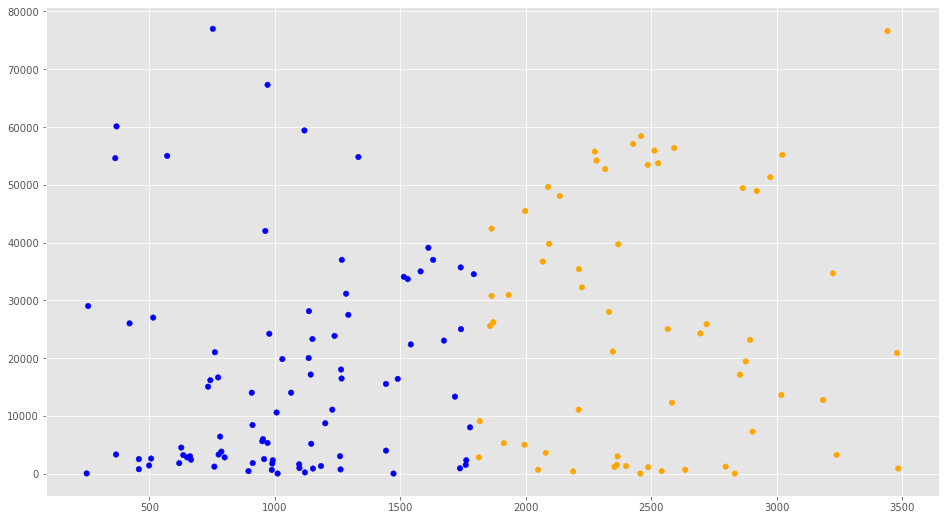

In [9]:
"""Vamos a RECORTAR los datos en la zona donde se concentran más los puntos
 esto es en el eje X: entre 0 y 3.500
y en el eje Y: entre 0 y 80.000"""
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]

colores=['orange','blue']
tamanios=[30,60]

f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values

"""Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras"""
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [10]:
"""Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y"""
dataX =filtered_data[["Word count"]]
X_train = np.array(dataX)
y_train = filtered_data['# Shares'].values

"""Creamos el objeto de Regresión Linear"""
regr = linear_model.LinearRegression()

"""Entrenamos nuestro modelo"""
regr.fit(X_train, y_train)

"""Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)"""
y_pred = regr.predict(X_train)

"""Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente"""
print('Coefficients: \n', regr.coef_)
"""Este es el valor donde corta el eje Y (en X=0)"""
print('Independent term: \n', regr.intercept_)
"""Error Cuadrado Medio"""
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
"""Puntaje de Varianza. El mejor puntaje es un 1.0"""
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [5.69765366]
Independent term: 
 11200.303223074163
Mean squared error: 372888728.34
Variance score: 0.06


In [11]:
"""Vamos a comprobar:
Quiero predecir cuántos "Shares" voy a obtener por un artículo con 2.000 palabras,
según nuestro modelo, hacemos:"""
y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil))

22595


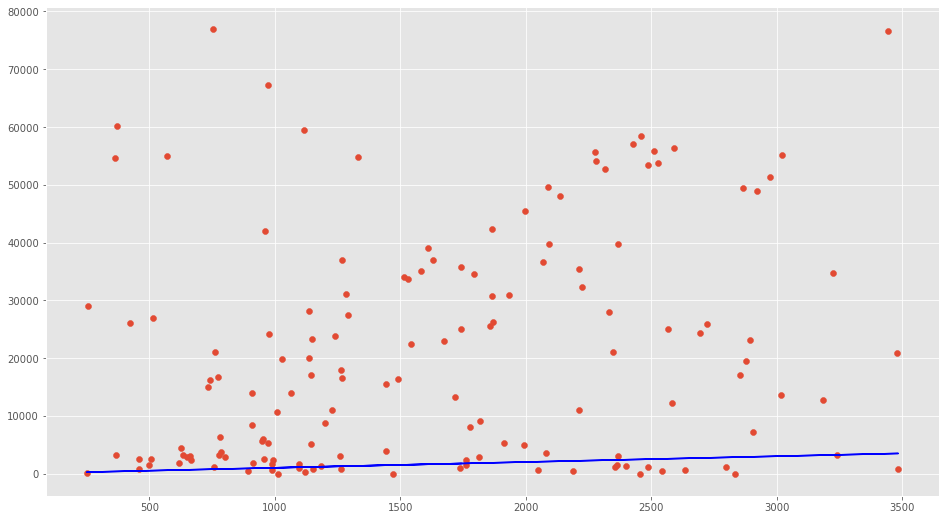

In [18]:
"""Visualizing the regression line"""
plt.scatter(X_train, y_train)
plt.plot(X_train, X_train, 'b')
plt.show()